<a href="https://colab.research.google.com/github/Guilherm0/Clustering/blob/main/KmeansPratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%%capture
%pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import k_means, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

## Simulated Data

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-5.039405,2.891648
1,-4.453512,3.496162
2,5.274361,1.464998
3,7.493971,4.809172
4,-4.987663,2.701800


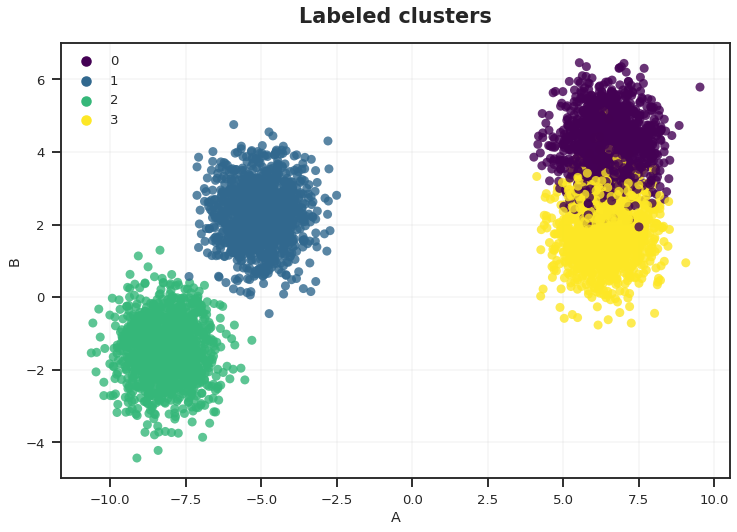

In [ ]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

## Distinct APIs for K-means

In [ ]:
# Usando função
centroids, labels, intertia = k_means(X, n_clusters=4)

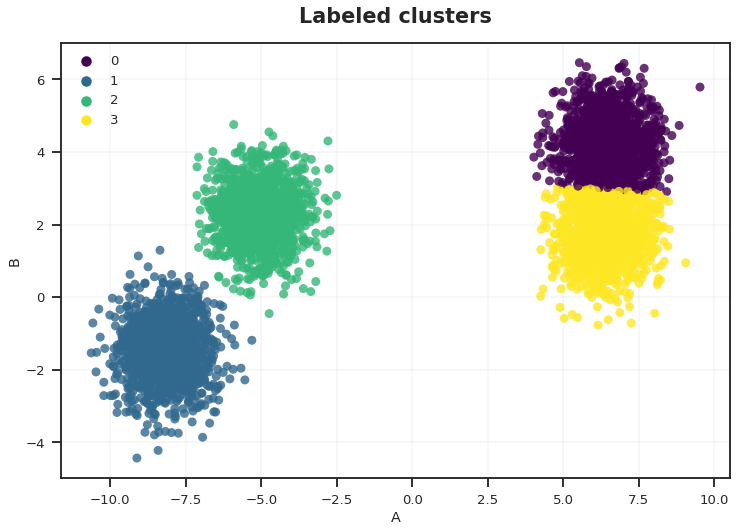

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [ ]:
# Using KMeans
model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

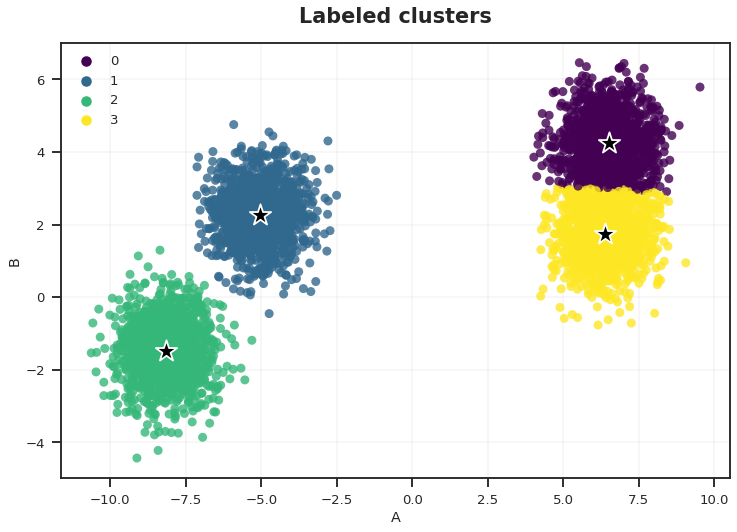

In [ ]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

## Model evaluation

In [ ]:
# sklearn metrics
silhouette_score(X, labels)
davies_bouldin_score(X, labels)
calinski_harabasz_score(X, labels)

64109.18063720647

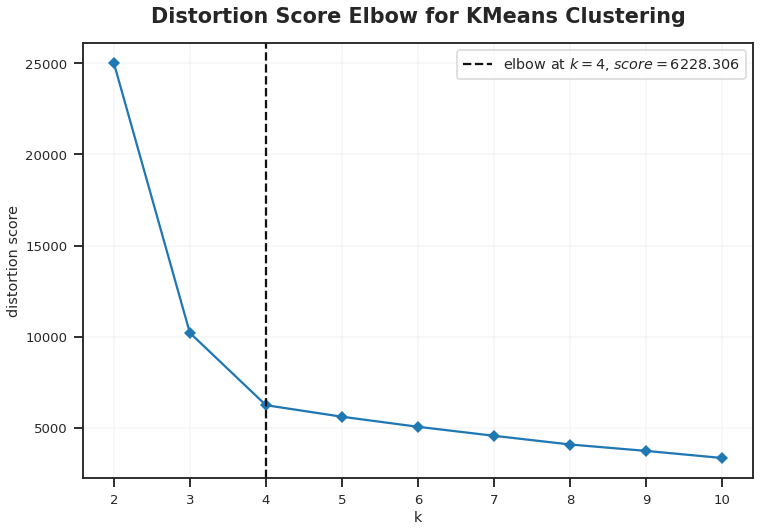

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1adfbb61d0>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
# kelbow_visualizer
kelbow_visualizer(KMeans(), X, k=10, timings=False)

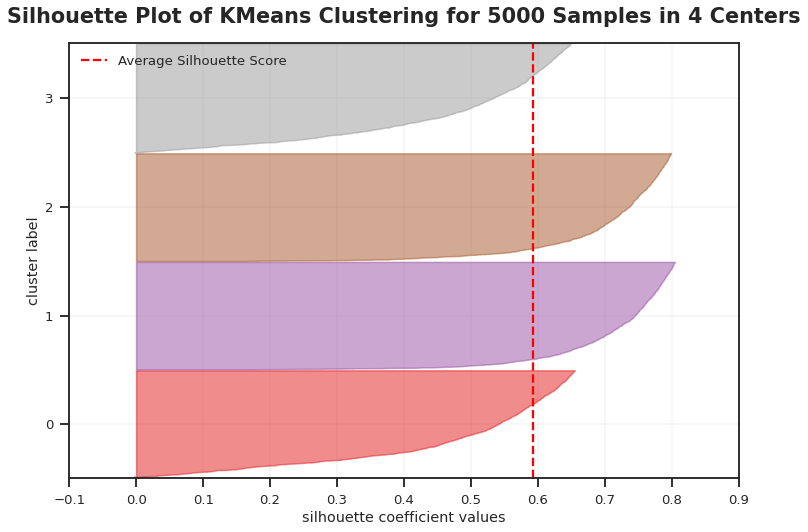

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1adf9e6310>,
                     estimator=KMeans(n_clusters=4))

In [ ]:
# silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=4), X)

Testando distintos agrupamentos:

In [ ]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

[{'k': 2,
  'inertia': 25043.514259015712,
  'silhouette_score': 0.8003601174218811,
  'davies_bouldin_score': 0.30798067620923564,
  'calinski_harabasz_score': 44095.88812467321},
 {'k': 3,
  'inertia': 10202.720509127139,
  'silhouette_score': 0.7638666810706567,
  'davies_bouldin_score': 0.347403606900803,
  'calinski_harabasz_score': 57742.17262675821},
 {'k': 4,
  'inertia': 6228.33915002352,
  'silhouette_score': 0.5930511336662388,
  'davies_bouldin_score': 0.5974496883476283,
  'calinski_harabasz_score': 64109.55973844229},
 {'k': 5,
  'inertia': 5592.018219022313,
  'silhouette_score': 0.5218326712485215,
  'davies_bouldin_score': 0.7967850075965448,
  'calinski_harabasz_score': 53691.39899371343},
 {'k': 6,
  'inertia': 5049.402376838056,
  'silhouette_score': 0.4138796568818412,
  'davies_bouldin_score': 1.0137210111142725,
  'calinski_harabasz_score': 47675.67596971707},
 {'k': 7,
  'inertia': 4537.94606343477,
  'silhouette_score': 0.3234585981775209,
  'davies_bouldin_sco

In [ ]:
# Create dataframe
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,25043.514259,0.800360,0.307981,44095.888125
3,10202.720509,0.763867,0.347404,57742.172627
4,6228.339150,0.593051,0.597450,64109.559738
5,5592.018219,0.521833,0.796785,53691.398994
6,5049.402377,0.413880,1.013721,47675.675970
7,4537.946063,0.323459,1.172725,44292.660112
8,4054.388137,0.317862,1.159569,42562.227554
9,3697.645423,0.316798,1.105643,40892.659201
10,3327.813864,0.323783,1.013110,40447.603774


In [ ]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,25043.514259,0.800360,0.307981,44095.888125
3,10202.720509,0.763867,0.347404,57742.172627
4,6228.339150,0.593051,0.597450,64109.559738
5,5592.018219,0.521833,0.796785,53691.398994
6,5049.402377,0.413880,1.013721,47675.675970
7,4537.946063,0.323459,1.172725,44292.660112
8,4054.388137,0.317862,1.159569,42562.227554
9,3697.645423,0.316798,1.105643,40892.659201
10,3327.813864,0.323783,1.013110,40447.603774


Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.13176893, 0.22330232],
       [0.52583752, 0.95593534],
       [0.33736707, 0.25988535],
       ...,
       [0.04406035, 0.80699123],
       [0.06524768, 0.54336362],
       [0.93820765, 0.65808437]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


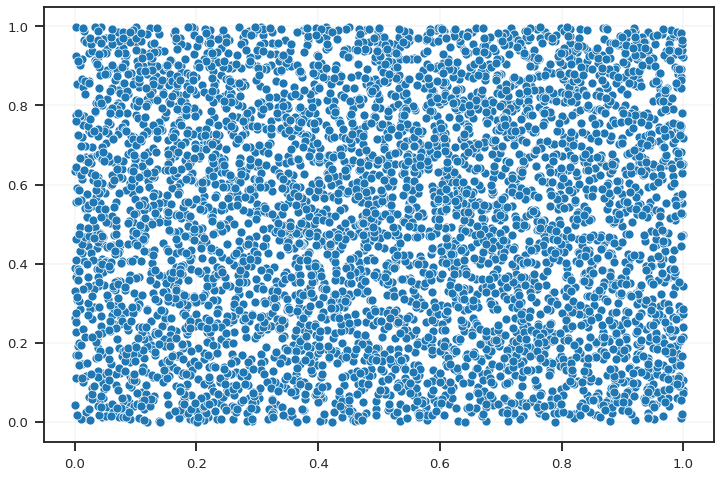

In [ ]:
sns.scatterplot(X_random[:,0], X_random[:,1])

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,519.909170,0.354112,1.182312,3019.502691
3,329.737712,0.378109,0.863112,3820.969774
4,208.857960,0.408891,0.769617,4984.636483
5,173.376072,0.395410,0.830599,4758.270111
6,147.615618,0.380633,0.831742,4644.334882
7,126.089083,0.370305,0.820153,4672.192977
8,106.777209,0.365152,0.816136,4857.045614
9,92.250721,0.365379,0.792254,5016.446813
10,84.736730,0.365332,0.818866,4902.721057


In [ ]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,519.909170,0.354112,1.182312,3019.502691
3,329.737712,0.378109,0.863112,3820.969774
4,208.857960,0.408891,0.769617,4984.636483
5,173.376072,0.395410,0.830599,4758.270111
6,147.615618,0.380633,0.831742,4644.334882
7,126.089083,0.370305,0.820153,4672.192977
8,106.777209,0.365152,0.816136,4857.045614
9,92.250721,0.365379,0.792254,5016.446813
10,84.736730,0.365332,0.818866,4902.721057


Comparando de forma interativa:

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

## High dimensional data

In [ ]:
# Simulate clusters with high dimensional data
X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [ ]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


In [ ]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


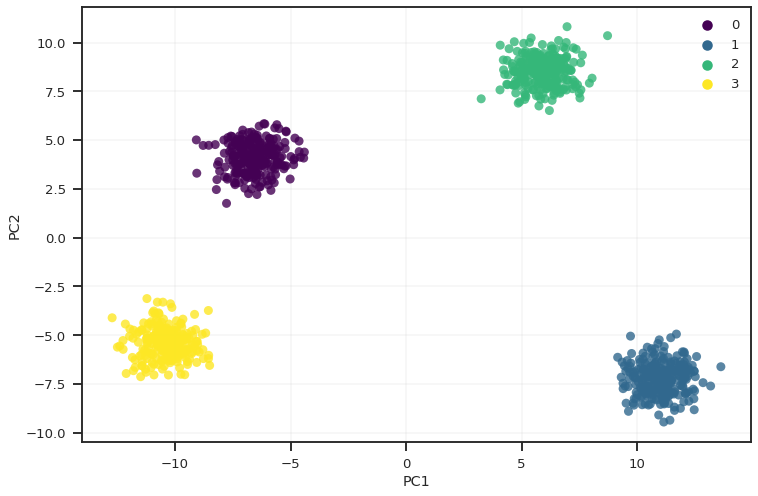

In [ ]:
# Plot PCA with true label
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

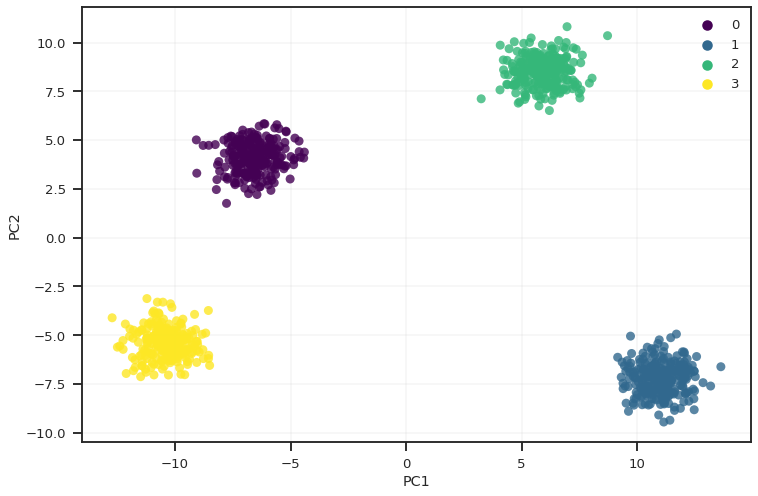

In [ ]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [ ]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')